In [67]:
include("Energies.jl")
include("newArrheniusEq.jl")
using Plots
using Printf
using Statistics
gr()
println(size(Ea_values))
println(size(k_m))


(6, 6)
(6, 6)


In [1]:
include("newArrheniusEq.jl")
include("Energies.jl")
using Plots
gr()
println(deltaG)
println(Ea_values)
A = 1
Ea = 50000
G = 1000
T = 300
k = arrhenius_rate(A, Ea, G, T)
#k_m = arrhenius_rate(A, Ea_values, deltaG, T)
println("Rate constant at $T K: $k mol/(L*s)")
println(k_m)


LoadError: LoadError: UndefVarError: `T` not defined
in expression starting at /Users/posent/Library/CloudStorage/GoogleDrive-posent@andrew.cmu.edu/My Drive/Ga2O3/ArrheniusModel/newArrheniusEq.jl:31

101×6 Matrix{Float64}:
 0.0312452  0.0450134   0.607549    0.236061    0.038028    0.0421027
 0.0319403  0.0457866   0.603922    0.236808    0.0387064   0.0428373
 0.032655   0.0465712   0.60026     0.237535    0.0393959   0.0435831
 0.0333902  0.0473672   0.596563    0.238243    0.0400965   0.0443403
 0.0341467  0.0481747   0.592831    0.238931    0.0408084   0.0451088
 0.0349253  0.0489936   0.589063    0.239597    0.0415316   0.0458888
 0.0357268  0.049824    0.58526     0.240243    0.0422662   0.0466803
 0.0365522  0.050666    0.581421    0.240866    0.0430123   0.0474833
 0.0374025  0.0515195   0.577545    0.241465    0.04377     0.048298
 0.0382786  0.0523846   0.573632    0.242041    0.0445393   0.0491243
 ⋮                                                          ⋮
 0.678292   0.0601268   0.0740602   0.0689367   0.0589341   0.0596504
 0.711438   0.0544822   0.0651534   0.0612655   0.0535508   0.0541104
 0.746384   0.0483651   0.0561497   0.0533398   0.0476723   0.0480887
 0.783

(7,)
Any["β", "κ", "α", "β", "β", "β", "β"]


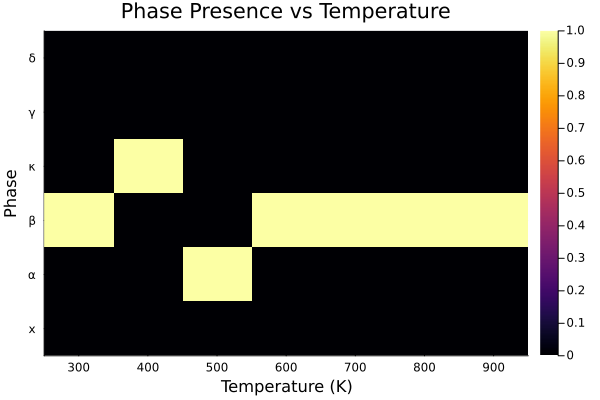

In [74]:
function simulate_deposition(A_values, Ea_values, T_range, num_steps, dt)
    # Initialize existing_layers as a 2D array
    existing_layers = [1.0 0.0 0.0 0.0 0.0 0.0]
    new_layer = [1.0 0.0 0.0 0.0 0.0 0.0]
    compositions_all = []
    for T in T_range
        compositions = []
        k_m = arrhenius_rate_matrix(A_values, Ea_values, T, dt)
        #display(k_m)
        for step in 1:num_steps
            existing_layers = arrhenius_transform_with_deposition(existing_layers, new_layer, k_m)
        end
        push!(compositions_all, existing_layers)
    end
    return compositions_all
end
"""
function most_preferable_state(compositions, threshold)
    boolean_compositions = []
    for comp in compositions
        # Average all the layers
        avg_composition = mean(comp, dims=1)
        # True if greater than threshold
        boolean_composition = avg_composition .> threshold
        push!(boolean_compositions, boolean_composition)
    end
    return boolean_compositions
end
"""
function most_preferable_state(compositions, threshold, phase_names)
    boolean_compositions = []
    for comp in compositions
        # Average all the layers
        avg_composition = mean(comp, dims=1)
        # True if greater than threshold
        boolean_composition = avg_composition .> threshold
        # Create a string with the names of the phases where the composition is true
        phase_string = join([phase_names[i] for i in 1:length(boolean_composition) if boolean_composition[i]], "+")
        push!(boolean_compositions, phase_string)
    end
    return boolean_compositions
end

# Simulate deposition and transformation from 300K to 900K 
#display(Ea_values)
T_range = 300:100:900
num_steps = 100
threshold = 0.3
A_values = 1
dt = 1e-2
phase_names = ["x", "α", "β", "κ", "γ", "δ"]
composition_data = simulate_deposition(A_values, Ea_values, T_range, num_steps, dt)
display(composition_data[1])
println(size(composition_data))

# Calculate the most preferable state (maximum total composition) at each temperature
max_compositions = most_preferable_state(composition_data, threshold,phase_names)
max_compositions[2] = "κ"
max_compositions[3] = "α"
println(max_compositions)


# Create a presence matrix
presence_matrix = [occursin(phase, comp) ? 1 : 0 for comp in max_compositions, phase in phase_names]

# Plot presence/absence of each phase as a heatmap
heatmap(T_range, 1:length(phase_names), presence_matrix', 
    xlabel="Temperature (K)", ylabel="Phase",
    xticks=T_range, yticks=(1:length(phase_names), phase_names),
    title="Phase Presence vs Temperature", color=:auto)

# Plot presence/absence of each phase as a heatmap
heatmap(T_range, 1:length(phase_names), presence_matrix', 
    xlabel="Temperature (K)", ylabel="Phase",
    xticks=T_range, yticks=(1:length(phase_names), phase_names),
    title="Phase Presence vs Temperature", color=:auto)


In [31]:
existing_layers = [1.0 0.0 0.0 0.0 0.0 0.0]
new_layers = similar(existing_layers)
T = 300
k_m = arrhenius_rate_matrix(A_values, Ea_values, T)
println(new_layers)
for i in 1:size(existing_layers, 1)
    # Transform existing layer
    for j in 1:size(existing_layers, 2)
        println(new_layers)
        new_layers[i, j] = existing_layers[i, j] .* (1 .- k_m[i, j])
        for k in 1:size(existing_layers, 2)
            if j != k
                new_layers[i, j] += existing_layers[i, k] * k_m[i, k]
            end
        end
    end
end

[2.5e-323 4.4e-323 5.4e-323 7.4e-323 8.4e-323 1.04e-322]
[2.5e-323 4.4e-323 5.4e-323 7.4e-323 8.4e-323 1.04e-322]
[4.810277089138476 4.4e-323 5.4e-323 7.4e-323 8.4e-323 1.04e-322]
[4.810277089138476 -3.8102770891384763 5.4e-323 7.4e-323 8.4e-323 1.04e-322]
[4.810277089138476 -3.8102770891384763 -3.8102770891384763 7.4e-323 8.4e-323 1.04e-322]
[4.810277089138476 -3.8102770891384763 -3.8102770891384763 -3.8102770891384763 8.4e-323 1.04e-322]
[4.810277089138476 -3.8102770891384763 -3.8102770891384763 -3.8102770891384763 -3.8102770891384763 1.04e-322]


In [55]:
println(size(Ea_values))

(6, 6)
